# Energy Prices and US GDP Final Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import seaborn as sns
import numpy as np

### Importing and organizing data from FRED

In [2]:
# import data, save to dataframe as 'energy'
codes = ['GDP', 'DCOILWTICO', 'PNRGINDEXM', 'APU000074714', 'PNGASEUUSDM', 'DHHNGSP']

energy = web.DataReader(codes, 'fred', '1960-01-01')

energy.head()

,GDP,DCOILWTICO,PNRGINDEXM,APU000074714,PNGASEUUSDM,DHHNGSP
DATE,,,,,,
1960-01-01,542.648,NaN,NaN,NaN,NaN,NaN
1960-04-01,541.080,NaN,NaN,NaN,NaN,NaN
1960-07-01,545.604,NaN,NaN,NaN,NaN,NaN
1960-10-01,540.197,NaN,NaN,NaN,NaN,NaN
1961-01-01,545.018,NaN,NaN,NaN,NaN,NaN


In [3]:
# rename columns
energy = energy.rename(columns={'DCOILWTICO': 'Crude Oil Price',            # Daily
                                'PNRGINDEXM':'Energy Index',                # Monthly
                                'APU000074714':'Avg Gas Price US',          # Monthly
                                'PNGASEUUSDM':'Global Nat Gas Price',       # Monthly
                                'DHHNGSP':'HH Natural Gas Spot Price'})     # Daily
energy.head()

,GDP,Crude Oil Price,Energy Index,Avg Gas Price US,Global Nat Gas Price,HH Natural Gas Spot Price
DATE,,,,,,
1960-01-01,542.648,NaN,NaN,NaN,NaN,NaN
1960-04-01,541.080,NaN,NaN,NaN,NaN,NaN
1960-07-01,545.604,NaN,NaN,NaN,NaN,NaN
1960-10-01,540.197,NaN,NaN,NaN,NaN,NaN
1961-01-01,545.018,NaN,NaN,NaN,NaN,NaN


In [4]:
# downsample to quarterly--> now I can work w/ GDP (quarterly data). Used '.mean()' b/c '.sum()' would create 
# meaningless numbers. 
energy_q = energy.resample('QS').mean() 

energy_q.tail()

,GDP,Crude Oil Price,Energy Index,Avg Gas Price US,Global Nat Gas Price,HH Natural Gas Spot Price
DATE,,,,,,
2021-04-01,22740.959,66.186667,156.755553,2.988333,8.860698,2.950000
2021-07-01,23202.344,70.575469,193.884443,3.251000,16.653225,4.354219
2021-10-01,24002.815,77.327302,245.355481,3.425000,28.494484,4.753492
2022-01-01,24382.683,95.180323,281.653463,3.772333,NaN,4.668710
2022-04-01,NaN,102.771923,NaN,4.271000,NaN,6.924815


In [5]:
# convert GDP to $trillions.
energy_q['GDP'] = energy_q['GDP']/1000

In [6]:
energy_q.head()

,GDP,Crude Oil Price,Energy Index,Avg Gas Price US,Global Nat Gas Price,HH Natural Gas Spot Price
DATE,,,,,,
1960-01-01,0.542648,NaN,NaN,NaN,NaN,NaN
1960-04-01,0.541080,NaN,NaN,NaN,NaN,NaN
1960-07-01,0.545604,NaN,NaN,NaN,NaN,NaN
1960-10-01,0.540197,NaN,NaN,NaN,NaN,NaN
1961-01-01,0.545018,NaN,NaN,NaN,NaN,NaN


### Create 'energy_pct_5', a df of recent (2017-present) growth rates

In [7]:
energy_pct = energy_q.pct_change() * 100

In [8]:
energy_pct_5 = energy_pct[energy_pct.index >= '2017-01-01']
energy_pct_5.head()

,GDP,Crude Oil Price,Energy Index,Avg Gas Price US,Global Nat Gas Price,HH Natural Gas Spot Price
DATE,,,,,,
2017-01-01,0.979917,5.058933,7.166738,4.699700,26.356371,-0.839868
2017-04-01,0.882368,-6.814012,-7.568727,2.409293,-12.909528,2.015409
2017-07-01,1.220173,0.162076,4.073331,2.016524,10.475567,-4.026208
2017-10-01,1.657943,14.702860,17.030175,2.827728,19.060981,-1.512585
2018-01-01,1.311429,13.823838,8.403769,2.603124,15.872659,5.932932


### Create 'rmean2' (energy_pct_5 w/ rolling average (w=2)):

In [9]:
# create a rolling mean of both US GDP and EU prices (smoother data)
EU_rmean = energy_pct_5['Global Nat Gas Price'].rolling(window=2).mean()
GDP_rmean = energy_pct_5['GDP'].rolling(window=2).mean()
US_rmean = energy_pct_5['Avg Gas Price US'].rolling(window=2).mean()
HH_rmean = energy_pct_5['HH Natural Gas Spot Price'].rolling(window=2).mean()
CO_rmean = energy_pct_5['Crude Oil Price'].rolling(window=2).mean()
EI_rmean = energy_pct_5['Energy Index'].rolling(window=2).mean()

In [10]:
rmean2_dict = {'GDP_rmean':GDP_rmean,
               'EI_rmean':EI_rmean,
               'EU_rmean':EU_rmean, 
               'US_rmean':US_rmean, 
               'HH_rmean':HH_rmean, 
               'CO_rmean':CO_rmean}

rmean2 = pd.DataFrame(rmean2_dict)
rmean2.head()

,GDP_rmean,EI_rmean,EU_rmean,US_rmean,HH_rmean,CO_rmean
DATE,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,0.931142,-0.200995,6.723422,3.554496,0.587770,-0.877539
2017-07-01,1.051270,-1.747698,-1.216981,2.212909,-1.005399,-3.325968
2017-10-01,1.439058,10.551753,14.768274,2.422126,-2.769397,7.432468
2018-01-01,1.484686,12.716972,17.466820,2.715426,2.210173,14.263349


### Create 'nrg' (big df containing both recent levels and pct change):

In [11]:
nrg = pd.merge(left = energy_q, 
               right = rmean2, 
               left_on = ['DATE'], 
               right_on = ['DATE'], 
               how = 'right', 
               indicator = True)
nrg.head()

,GDP,Crude Oil Price,Energy Index,Avg Gas Price US,Global Nat Gas Price,HH Natural Gas Spot Price,GDP_rmean,EI_rmean,EU_rmean,US_rmean,HH_rmean,CO_rmean,_merge
DATE,,,,,,,,,,,,,
2017-01-01,19.153912,51.621290,123.550750,2.324333,5.774486,3.015231,NaN,NaN,NaN,NaN,NaN,NaN,both
2017-04-01,19.322920,48.103810,114.199531,2.380333,5.029027,3.076000,0.931142,-0.200995,6.723422,3.554496,0.587770,-0.877539,both
2017-07-01,19.558693,48.181774,118.851256,2.428333,5.555846,2.952154,1.051270,-1.747698,-1.216981,2.212909,-1.005399,-3.325968,both
2017-10-01,19.882965,55.265873,139.091832,2.497000,6.614845,2.907500,1.439058,10.551753,14.768274,2.422126,-2.769397,7.432468,both
2018-01-01,20.143716,62.905738,150.780788,2.562000,7.664797,3.080000,1.484686,12.716972,17.466820,2.715426,2.210173,14.263349,both


## First visualization: Figure 1 (growth rates of different US energy prices)

### Creating 'usa', a df of only US energy prices and growth rates

In [12]:
usa = nrg[['GDP', 'Crude Oil Price', 'Avg Gas Price US', 'HH Natural Gas Spot Price',
           'GDP_rmean', 'CO_rmean', 'US_rmean', 'HH_rmean']]
usa.head()

,GDP,Crude Oil Price,Avg Gas Price US,HH Natural Gas Spot Price,GDP_rmean,CO_rmean,US_rmean,HH_rmean
DATE,,,,,,,,
2017-01-01,19.153912,51.621290,2.324333,3.015231,NaN,NaN,NaN,NaN
2017-04-01,19.322920,48.103810,2.380333,3.076000,0.931142,-0.877539,3.554496,0.587770
2017-07-01,19.558693,48.181774,2.428333,2.952154,1.051270,-3.325968,2.212909,-1.005399
2017-10-01,19.882965,55.265873,2.497000,2.907500,1.439058,7.432468,2.422126,-2.769397
2018-01-01,20.143716,62.905738,2.562000,3.080000,1.484686,14.263349,2.715426,2.210173


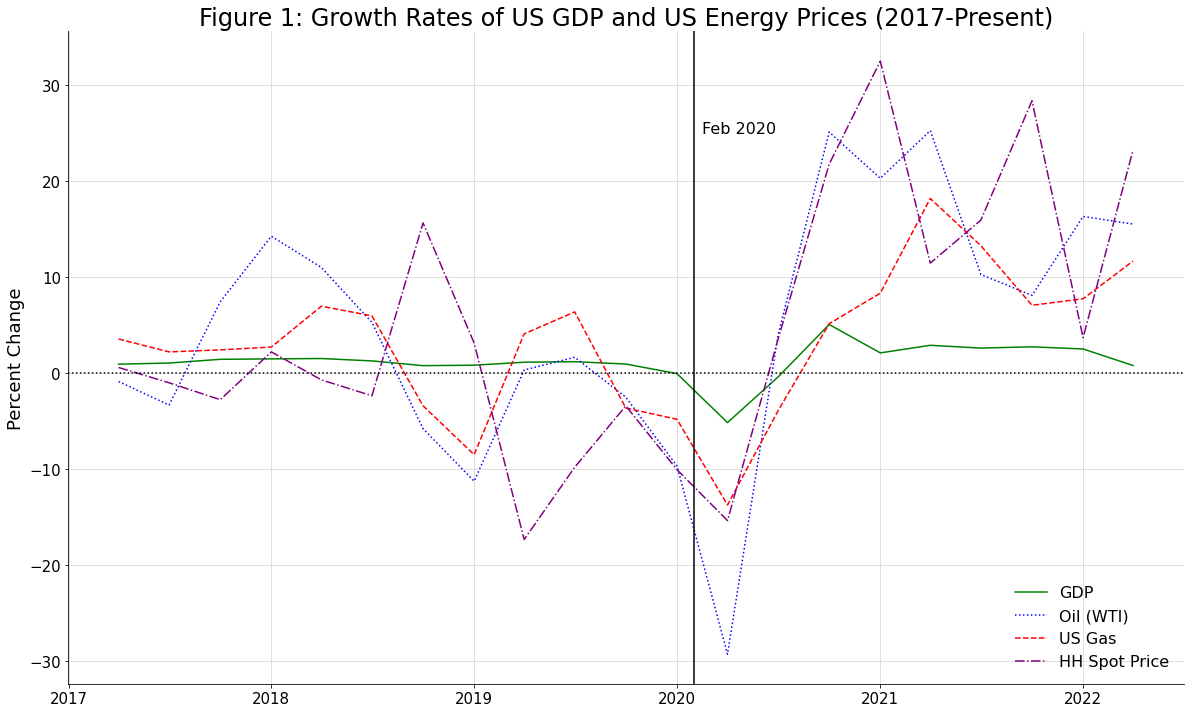

In [13]:
# Figure 1 (page 1 of report)

f, ax = plt.subplots(figsize=(20, 12))

ax.plot(usa.index, usa['GDP_rmean'], color='green', label='GDP')
ax.plot(usa.index, usa['CO_rmean'], color='blue', label='Oil (WTI)', linestyle='dotted')
ax.plot(usa.index, usa['US_rmean'], color='red', label='US Gas', linestyle='dashed')
ax.plot(usa.index, usa['HH_rmean'], color='purple', label='HH Spot Price', linestyle='dashdot')

ax.axhline(y=0, color='black', linestyle='dotted')

ax.set_title('Figure 1: Growth Rates of US GDP and US Energy Prices (2017-Present)', fontsize=24)
ax.set_ylabel('Percent Change', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(frameon=False, loc='lower right', fontsize=16)
sns.despine(ax=ax)

ax.axvline(x=dt.datetime(2020,2,1), color='black')
ax.text(dt.datetime(2020,2,15), 25, 'Feb 2020', fontsize=16)

plt.grid(alpha=0.5)

plt.savefig('Growth_Rates.svg')

plt.show()

# Stats
- This is the space I used to calculate some of the percentages seen in throughout the report

In [14]:
usgas_2010 = nrg.loc[dt.datetime(2010,1,1):dt.datetime(2019,10,1), 'Avg Gas Price US'].pct_change().mean()
usgas_2020 = nrg.loc[dt.datetime(2010,1,1):, 'Avg Gas Price US'].pct_change().mean()

print('The average percent change in US gas prices during the 2010s was {:.02f}%'.format(usgas_2010*100))
print('\nThe average percent change in US gas prices during the 2020s has been {:.02f}%'.format(usgas_2020*100))

The average percent change in US gas prices during the 2010s was 1.39%

The average percent change in US gas prices during the 2020s has been 3.43%


In [15]:
def pct(x, y):
    pct_ch = (y-x)/x
    return(pct_ch)*100

In [16]:
# us gas
x = 3.408
y = 4.312

print('US gas price has increased {0:.02f}% since Dec 2021.'.format(pct(x, y)))

US gas price has increased 26.53% since Dec 2021.


In [17]:
# crude oil
xc = 65.44
yc = 106.84

print('CO price has increased {0:.02f}% since Dec 2021.'.format(pct(xc, yc)))

CO price has increased 63.26% since Dec 2021.


In [18]:
# HH
xh = 4.31
yh = 7.44

print('HH price has increased {0:.02f}% since Dec 2021.'.format(pct(xh, yh)))

HH price has increased 72.62% since Dec 2021.


## Second visualization: Figure 2 (EU energy price growth rates)

### EU Prices

In [19]:
eu_nrg = nrg[['GDP', 'Energy Index', 'Global Nat Gas Price', 'GDP_rmean', 'EI_rmean', 'EU_rmean']]['2020-01-01':]
eu_nrg

,GDP,Energy Index,Global Nat Gas Price,GDP_rmean,EI_rmean,EU_rmean
DATE,,,,,,
2020-01-01,21.481367,103.803730,3.134921,-0.050649,-7.452172,-6.751426e-02
2020-04-01,19.477444,67.367237,1.724948,-5.155447,-26.787673,-3.420901e+01
2020-07-01,21.138574,90.269902,2.706814,-0.400088,-0.552296,5.972560e+00
2020-10-01,21.477597,104.113702,5.149859,5.066146,24.666375,7.358843e+01
2021-01-01,22.038226,141.636016,6.551773,2.107054,25.687878,5.873889e+01
2021-04-01,22.740959,156.755553,8.860698,2.899499,23.357335,3.123181e+01
2021-07-01,23.202344,193.884443,16.653225,2.608786,17.180389,6.159304e+01
2021-10-01,24.002815,245.355481,28.494484,2.739415,25.116565,7.952487e+01
2022-01-01,24.382683,281.653463,NaN,2.516278,20.670657,3.555245e+01


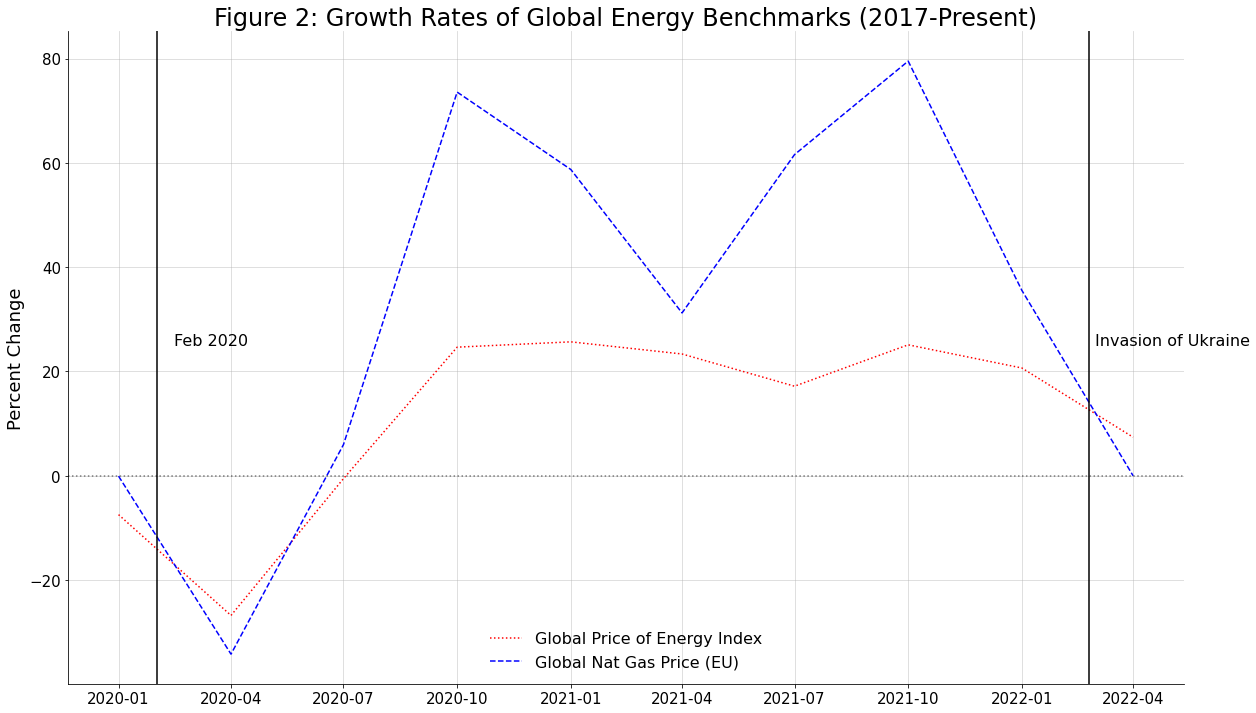

In [20]:
# Figure 2 (page 2)

f, ax = plt.subplots(figsize=(20, 12))


ax.plot(eu_nrg.index, eu_nrg['EI_rmean'], color='red', linestyle='dotted', label='Global Price of Energy Index')
ax.plot(eu_nrg.index, eu_nrg['EU_rmean'], color='blue', linestyle='dashed', label='Global Nat Gas Price (EU)')



ax.set_title('Figure 2: Growth Rates of Global Energy Benchmarks (2017-Present)', fontsize=24)
ax.set_ylabel('Percent Change', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(frameon=False, loc='lower center', fontsize=16)

ax.axhline(y=0, color='black', linestyle='dotted', alpha=0.5)

ax.axvline(x=dt.datetime(2020,2,1), color='black')
ax.text(dt.datetime(2020,2,15), 25, 'Feb 2020', fontsize=16)

ax.axvline(x=dt.datetime(2022,2,24), color='black')
ax.text(dt.datetime(2022,3,1), 25, 'Invasion of Ukraine', fontsize=16)

sns.despine(ax=ax)

plt.grid(alpha=0.5)

plt.savefig('Growth Rates Gl.svg')

plt.show()

## Regressions

In [21]:
import statsmodels.formula.api as smf  

In [22]:
# did this so the names would be easier to type
energy_q = energy_q.rename(columns={'Crude Oil Price':'COP', 'Energy Index':'EI', 'Avg Gas Price US':'AGP',
                          'Global Nat Gas Price':'GNGP', 'HH Natural Gas Spot Price':'HH'})
energy_q.head(2)

,GDP,COP,EI,AGP,GNGP,HH
DATE,,,,,,
1960-01-01,0.542648,NaN,NaN,NaN,NaN,NaN
1960-04-01,0.541080,NaN,NaN,NaN,NaN,NaN


In [23]:
# For this range of years, all variables have values
energy_97 = energy_q[(energy_q.index >= dt.datetime(1997,1,1)) &
                     (energy_q.index < dt.datetime(2022,1,1))]

energy_97.head(2)

,GDP,COP,EI,AGP,GNGP,HH
DATE,,,,,,
1997-01-01,8.362655,22.845082,55.390052,1.250333,2.901481,2.486897
1997-04-01,8.518825,19.921250,49.150741,1.228667,2.730000,2.159375


In [24]:
# Did this to see which regressors I should drop to avoid trivial results
energy_97.corr()

,GDP,COP,EI,AGP,GNGP,HH
GDP,1.000000,0.486516,0.506829,0.636304,0.469058,-0.165954
COP,0.486516,1.000000,0.988958,0.964441,0.758054,0.364660
EI,0.506829,0.988958,1.000000,0.969333,0.832453,0.370139
AGP,0.636304,0.964441,0.969333,1.000000,0.774564,0.254949
GNGP,0.469058,0.758054,0.832453,0.774564,1.000000,0.290605
HH,-0.165954,0.364660,0.370139,0.254949,0.290605,1.000000


**Looks like COP, EI, and AGP are very highly correlated. I'm going to keep only EI because that includes data of both oil and natural gas prices.**

In [25]:
# new df w/o repetitive variables

energy_97.drop(['COP', 'AGP', 'GNGP'], axis=1, inplace=True)
energy_97.head()

/Users/benstoffelmurray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GDP,EI,HH
DATE,,,
1997-01-01,8.362655,55.390052,2.486897
1997-04-01,8.518825,49.150741,2.159375
1997-07-01,8.662823,50.016249,2.516250
1997-10-01,8.765907,50.639834,2.801429
1998-01-01,8.866480,40.373710,2.188361


In [26]:
# primary OLS of EI on GDP

print(smf.ols('GDP ~ EI', data=energy_97).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     33.88
Date:                Wed, 11 May 2022   Prob (F-statistic):           7.42e-08
Time:                        13:51:14   Log-Likelihood:                -267.84
No. Observations:                 100   AIC:                             539.7
Df Residuals:                      98   BIC:                             544.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7537      0.823     13.073      0.0

**Strong evidence suggesting that a 1 unit change in the EI would lead to a 0.03 unit change in GDP. Since I'm trying to use EI as a predictor, I'll try the same regression but w/ lagged variables.**

In [27]:
# EI/GDP OLS but w/ lagged variables

print(smf.ols('GDP ~ EI + EI.shift(1) + EI.shift(2)', data=energy_97).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     10.40
Date:                Wed, 11 May 2022   Prob (F-statistic):           5.63e-06
Time:                        13:51:14   Log-Likelihood:                -261.27
No. Observations:                  98   AIC:                             530.5
Df Residuals:                      94   BIC:                             540.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.8250      0.864     12.528      

**Not useful b/c the lags are highly correlated...**

In [28]:
# Same thing but w/ only EI1

print(smf.ols('GDP ~ EI.shift(1)', data=energy_97).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.20
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.67e-07
Time:                        13:51:14   Log-Likelihood:                -265.97
No. Observations:                  99   AIC:                             535.9
Df Residuals:                      97   BIC:                             541.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.0690      0.835     13.258      

**Now I'm going to create some lags for HH and see how that stacks up.**

In [29]:
# initial HH reg

print(smf.ols('GDP ~ HH', data=energy_97).fit().summary())   # Not very useful

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.775
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0989
Time:                        13:51:14   Log-Likelihood:                -281.29
No. Observations:                 100   AIC:                             566.6
Df Residuals:                      98   BIC:                             571.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4337      0.914     17.975      0.0

In [30]:
# HH w/ lag1

print(smf.ols('GDP ~ HH.shift(1)', data=energy_97).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.154
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0789
Time:                        13:51:14   Log-Likelihood:                -277.41
No. Observations:                  99   AIC:                             558.8
Df Residuals:                      97   BIC:                             564.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.5745      0.905     18.321      

In [31]:
# w/ lag2

print(smf.ols('GDP ~ HH.shift(2)', data=energy_97).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.621
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0601
Time:                        13:51:14   Log-Likelihood:                -273.50
No. Observations:                  98   AIC:                             551.0
Df Residuals:                      96   BIC:                             556.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.7270      0.895     18.684      

**Looks like HH is basically useless...I won't use it for the rest of the project**

**I'm going to add a growth column that acts as a binary variable. This will allow me to run a proper probability model (probability that GDP will grow based on given EI value). This means that I want to deal w/ growth values (i.e. positive growth in EI-->positive growth in GDP, etc.).**

**Also, I'm going to detrend the variables for time**

In [32]:
import scipy as sp
from scipy import signal

energy_97['growth'] = np.where(energy_97['GDP'].pct_change() > 0, 1, 0)       # create growth variable
energy_97['EI1'] = energy_97['EI'].shift(1)                                   # create shifted variable

# drop growth so I don't detrend it
energy_dt = sp.signal.detrend(energy_97.drop(['growth'], axis=1).loc[dt.datetime(1997,4,1):,], type='linear')

print(type(energy_dt))

eng_dt = pd.DataFrame(energy_dt, columns=['GDP', 'EI', 'HH', 'EI1'])

eng_dt['growth'] = np.where(eng_dt['GDP'].pct_change() > 0, 1, 0)


# re-enter datetime index
dates = pd.date_range(start="1997-01-01", end="2021-10-01", freq='QS').to_pydatetime().tolist()
dates = pd.Series(dates)
eng_dt['DATE'] = dates
eng_dt.set_index('DATE', inplace=True)

eng_dt.head()

<class 'numpy.ndarray'>


/var/folders/bq/kkj2sxkn2h3gn27pxd_dpz700000gn/T/ipykernel_23210/4293354926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_97['growth'] = np.where(energy_97['GDP'].pct_change() > 0, 1, 0)       # create growth variable
/var/folders/bq/kkj2sxkn2h3gn27pxd_dpz700000gn/T/ipykernel_23210/4293354926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_97['EI1'] = energy_97['EI'].shift(1)                                   # create shifted variable


,GDP,EI,HH,EI1,growth
DATE,,,,,
1997-01-01,-6.242576,25.027109,-31.326489,12.541956,0
1997-04-01,-7.829129,26.127921,-28.768454,10.469662,1
1997-07-01,-7.903054,26.379610,-29.050057,10.573501,1
1997-10-01,-3.580409,19.213349,-27.685471,12.052531,0
1998-01-01,-4.796237,18.765911,-23.143112,9.173438,1


## Third Visualization: Figure 3 (EI vs. US GDP levels, detrended)

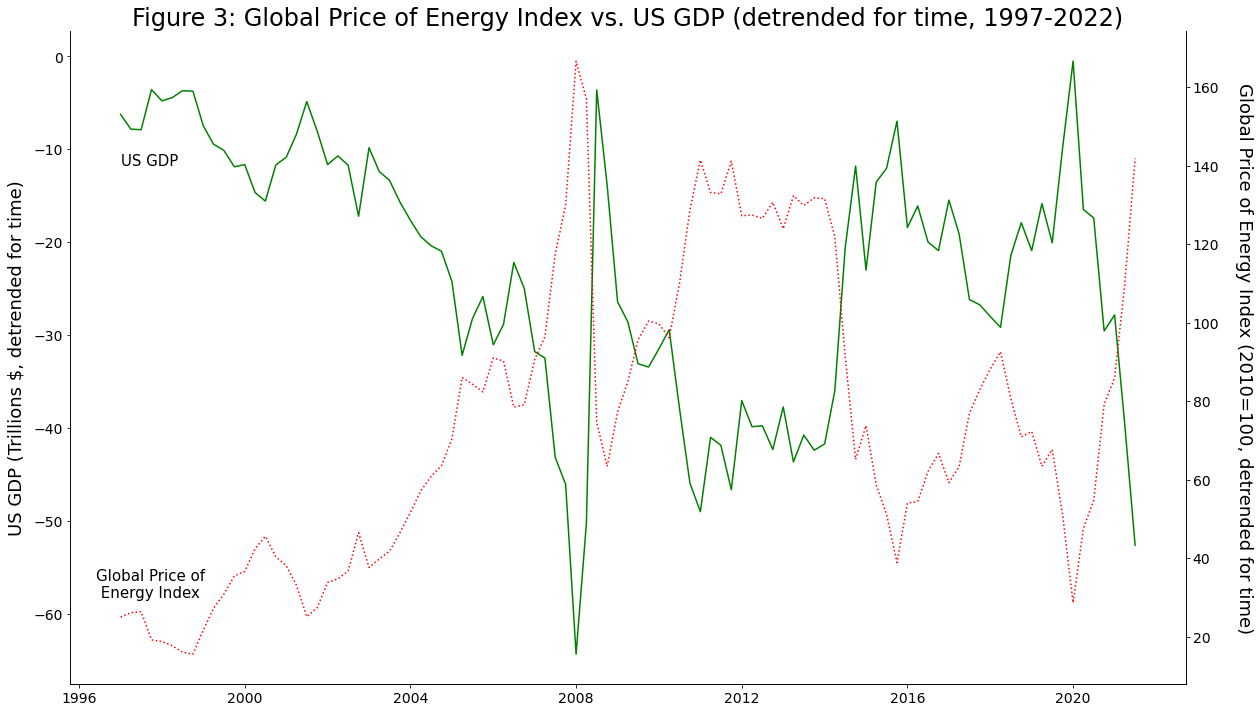

In [33]:
# Figure 3 (page 3)

f, ax = plt.subplots(figsize=(20, 12))

ax2 = ax.twinx()

ax.plot(eng_dt.index, eng_dt['GDP'], color='green', label='US GDP')
ax2.plot(eng_dt.index, eng_dt['EI'], color='red', linestyle='dotted', label='Global Price of Energy Index')

ax.set_title('Figure 3: Global Price of Energy Index vs. US GDP (detrended for time, 1997-2022)', fontsize=24)
ax.set_ylabel('US GDP (Trillions $, detrended for time)', fontsize=18)
ax2.set_ylabel('Global Price of Energy Index (2010=100, detrended for time)', fontsize=18, rotation=270)
ax.yaxis.set_label_coords(-0.04, .5)
ax2.yaxis.set_label_coords(1.06, .5)

plt.text(x=dt.datetime(1997,1,1), y=140, s='US GDP', fontsize=15)
plt.text(x=dt.datetime(1996,6,1), y=30, s='Global Price of \n Energy Index', fontsize=15)

ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)


ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.savefig('Figure 3: EI vs. GDP (detrended).svg')

plt.show()

### Logit model of detrended data (lagged EI values, growth binary variable)

In [34]:
e_dt = smf.logit('growth ~ EI1', data=eng_dt).fit().fittedvalues

print(smf.logit('growth ~ EI1', data=eng_dt).fit().summary())
print(e_dt)

Optimization terminated successfully.
         Current function value: 0.639688
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.639688
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 growth   No. Observations:                   99
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 May 2022   Pseudo R-squ.:                 0.04592
Time:                        13:51:14   Log-Likelihood:                -63.329
converged:                       True   LL-Null:                       -66.377
Covariance Type:            nonrobust   LLR p-value:                   0.01355
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

In [35]:
# fit to logistic eq
edt_prob = np.exp(e_dt) / (1+np.exp(e_dt))
edt_prob

DATE
1997-01-01    0.739824
1997-04-01    0.755060
1997-07-01    0.754311
1997-10-01    0.743477
1998-01-01    0.764278
                ...   
2020-07-01    0.680540
2020-10-01    0.679499
2021-01-01    0.588511
2021-04-01    0.585172
2021-07-01    0.527627
Length: 99, dtype: float64

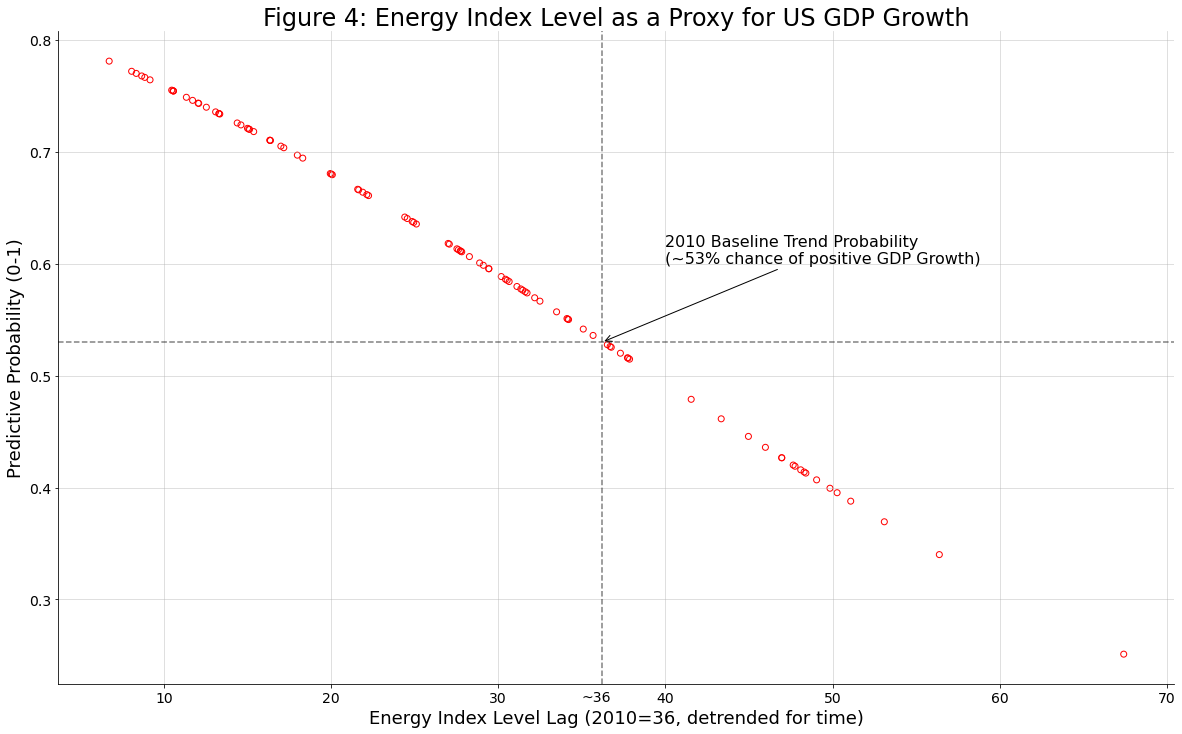

In [36]:
# Figure 4 (page 4)

f, ax = plt.subplots(figsize=(20, 12))

ax.scatter(eng_dt['EI1'], edt_prob, edgecolor='red', facecolor='none')

ax.set_title('Figure 4: Energy Index Level as a Proxy for US GDP Growth', fontsize=24)
ax.set_xlabel('Energy Index Level Lag (2010=36, detrended for time)', fontsize=18)
ax.set_ylabel('Predictive Probability (0-1)', fontsize=18)

ax.tick_params(labelsize=14)

sns.despine(ax=ax)

ax.axvline(x=36.235, color='black', linestyle='dashed', alpha=0.5)
ax.axhline(y=0.53, color='black', linestyle='dashed', alpha=0.5)

ax.annotate('2010 Baseline Trend Probability \n(~53% chance of positive GDP Growth)', 
            xy=(36.235, 0.53),
            xytext=(40, 0.6),
            arrowprops={'arrowstyle':'->'}, fontsize=16)

plt.text(x=35, y=0.2091, s='~36', fontsize=14)

plt.grid(alpha=0.5)

plt.savefig('Detrended Energy Index.svg')

plt.show()

### Results:
- As the price of energy increases, US GDP is more likely to see negative growth (less likely to see positive growth)
- I tried to do the same logit model w/ detrended growth rates but it wasn't statistically significant

### Here I was trying to do my proportional calculation of March 2020's EI value predictive probability
- I ended up getting ~27% chance of growth next quarter

In [37]:
# new df w/ updated info

EI = web.DataReader('PNRGINDEXM', 'fred', '1997-01-01')
EI.rename(columns={'PNRGINDEXM':'EI'}, inplace=True)
EI.tail()

,EI
DATE,
2021-11-01,237.354472
2021-12-01,241.339613
2022-01-01,242.917171
2022-02-01,263.711541
2022-03-01,338.331679


In [38]:
# detrend

EI_dt = sp.signal.detrend(EI['EI'], type='linear')
EI_dt = pd.DataFrame(EI_dt)

EI_dt

,0
0,-12.745211
1,-21.299360
2,-24.686475
3,-27.750658
4,-25.158099
...,...
298,42.862628
299,46.445328
300,47.620445
301,68.012375


In [39]:
base_ei_dt = eng_dt['EI'].loc[dt.datetime(2010,1,1):dt.datetime(2010,10,1),].mean()

new_ei_dt = EI_dt[0].iloc[-1,]

print('The 2010 detrended baseline level is {:.02f}'.format(base_ei_dt))
print('\nThe most recent detrended level is {:.02f}'.format(new_ei_dt))

print('The associated prob of the most recent EI observatino (338.33) is ~0.27')

The 2010 detrended baseline level is 108.63

The most recent detrended level is 142.23
The associated prob of the most recent EI observatino (338.33) is ~0.27
